In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

import sklearn.metrics as sklm
import sklearn.model_selection as ms

from sklearn import linear_model
from sklearn import preprocessing

%matplotlib inline

In [96]:
#alldata = pd.read_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/train1.csv")
alldata = pd.read_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/train2.csv")
#alldata.dtypes

print (alldata.shape)
#print(alldata.prevalence_of_undernourishment.unique().shape)
#no duplication data

#print (alldata.columns)

(1369, 37)


In [97]:
#alldata.head(30)

In [98]:
country_list = alldata['country_code'].unique()
#country_list

In [99]:
for country in country_list:
    alldata.loc[alldata['country_code'] == country] = alldata.loc[alldata['country_code'] == country].fillna(alldata.loc[alldata['country_code'] == country].mean())

alldata = alldata.fillna(alldata.mean())
#alldata.head(15)

In [100]:
alldata.to_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/train1_fillna.csv")
alldata = alldata.reset_index()

In [101]:
labels = np.array(alldata['prevalence_of_undernourishment'])

In [102]:
#all 35 availuble features
features = np.array(alldata[alldata.columns.values[3:]])
len(alldata.columns.values[3:])

35

In [103]:
select_corr23 = ['access_to_improved_water_sources',
'access_to_electricity',
'obesity_prevalence',
'access_to_improved_sanitation',
'avg_supply_of_protein_of_animal_origin',
'fertility_rate',
'open_defecation',
'life_expectancy',
'avg_value_of_food_production',
'net_oda_received_percent_gni',
'caloric_energy_from_cereals_roots_tubers',
'political_stability',
'gross_domestic_product_per_capita_ppp',
'anemia_prevalence',
'population_growth',
'per_capita_food_production_variability',
'cereal_yield',
'unemployment_rate',
'food_imports_as_share_of_merch_exports',
'year',
'co2_emissions',
'military_expenditure_share_gdp',
'percentage_of_arable_land_equipped_for_irrigation'
]

In [104]:
#top 23 features
features = np.array(alldata[select_corr23])

In [105]:
indx = range(features.shape[0])
indx = ms.train_test_split(indx, train_size=1156, shuffle=False) #1156
x_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [106]:
scale = preprocessing.StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [107]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    #print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    #print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    #print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    #print('R^2                    = ' + str(r2))
    #print('Adjusted R^2           = ' + str(r2_adj))

In [108]:
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train, y_train)

y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 8.77246474312562


In [109]:
ridgecv = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
ridgecv.fit(x_train, y_train)  

lassocv = linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])
lassocv.fit(x_train, y_train)

print(ridgecv.alpha_, lassocv.alpha_)

10.0 1.0


In [110]:
ridge_mod = linear_model.Ridge (alpha = 10)
ridge_mod.fit(x_train, y_train)

y_score = ridge_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 8.62243644858752


In [111]:
lasso_mod = linear_model.Lasso (alpha = 0.5) # 1.0 looks like overfitting, currently 0.5 performs best
lasso_mod.fit(x_train, y_train)

y_score = lasso_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 7.760715382779565


In [112]:
lassocv = linear_model.LassoCV(cv=5).fit(x_train, y_train)

y_score = lassocv.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 7.790224907215343


In [113]:
lassolarscv = linear_model.LassoLarsCV(cv=5).fit(x_train, y_train)

y_score = lassolarscv.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 7.756999680360334


In [114]:
lassolars = linear_model.LassoLars (alpha = 0.1)
lassolars.fit(x_train, y_train)

y_score = lassolars.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 8.97032990822496


In [115]:
elasticnet = linear_model.ElasticNet(random_state=0)
elasticnet.fit(x_train, y_train)

y_score = elasticnet.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 7.7179205543662786


(-1.0959153307742788, 1.5418186787649626, -5.6668530993838, 2.069568610184362)

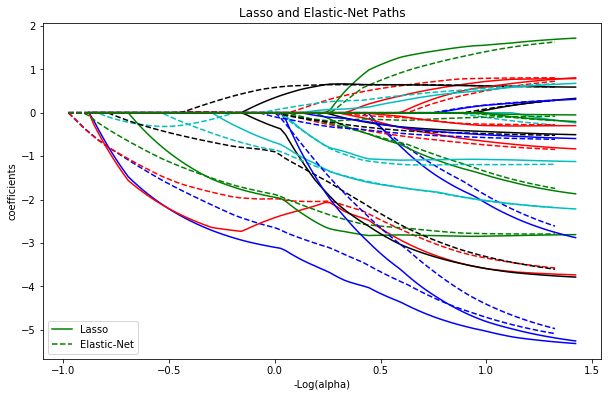

In [116]:
from itertools import cycle

eps = 5e-3  # the smaller it is the longer is the path
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(x_train, y_train, eps, fit_intercept=False)
alphas_enet, coefs_enet, _ = linear_model.enet_path(x_train, y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)

plt.figure(1,figsize=(10, 6.18),)
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle='-',c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

In [117]:
testdata = pd.read_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/test1.csv")

country_list = testdata['country_code'].unique()

for country in country_list:
    testdata.loc[testdata['country_code'] == country] = testdata.loc[testdata['country_code'] == country].fillna(testdata.loc[testdata['country_code'] == country].mean())

testdata = testdata.fillna(testdata.mean())

testdata.to_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/test1_fillna.csv")
#testdata = testdata.reset_index()

In [118]:
##all 35 availuble features
x_predi = np.array(testdata[testdata.columns.values[2:]])
##top 23 features
x_predi = np.array(testdata[select_corr23])

scale.fit(x_predi)
x_predi = scale.transform(x_predi)

In [119]:
y_predi = lasso_mod.predict(x_predi) #currently best score: 9.0162
y_predien = elasticnet.predict(x_predi)
np.savetxt("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/predi2_lasso.csv",y_predi,delimiter=",")
np.savetxt("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/predi2_en.csv",y_predien,delimiter=",")

In [120]:
o_target = pd.read_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/download/train_labels.csv")
o_target.describe()

,row_id,prevalence_of_undernourishment
count,1401.000000,1401.000000
mean,700.000000,15.510697
std,404.578175,11.610440
min,0.000000,2.493428
25%,350.000000,5.710856
50%,700.000000,12.118656
75%,1050.000000,22.447492
max,1400.000000,59.089781


In [121]:
select_corr10 = ['prevalence_of_undernourishment',
'access_to_improved_water_sources',
'access_to_electricity',
'obesity_prevalence',
'access_to_improved_sanitation',
'avg_supply_of_protein_of_animal_origin',
'fertility_rate',
'open_defecation',
'life_expectancy',
'avg_value_of_food_production',
'net_oda_received_percent_gni'
]

#sns_plot = sns.pairplot(alldata[select_corr10])
#sns_plot.savefig("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/corr.png")


In [122]:
#alldata[select_corr10].corr()

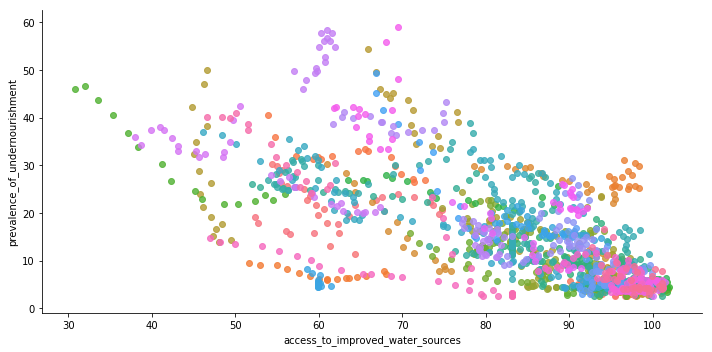

In [123]:
sns.lmplot(data=alldata, y="prevalence_of_undernourishment", x="access_to_improved_water_sources", hue="country_code", fit_reg=False, legend=False, aspect=2)

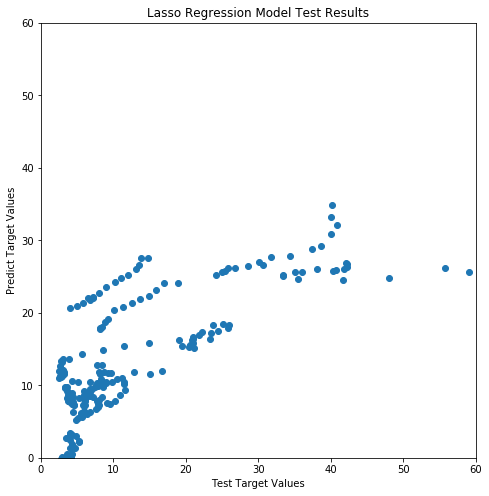

In [124]:
plt.figure(1,figsize=(8, 8),)

plt.scatter(y_test, y_score)
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.title('Lasso Regression Model Test Results')
plt.xlabel(r'Test Target Values')
plt.ylabel(r'Predict Target Values')
plt.axes().set_aspect('equal')

In [125]:
alldata.describe().to_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/feature_describe.csv")
alldata.median().to_csv("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/feature_describe_median.csv")

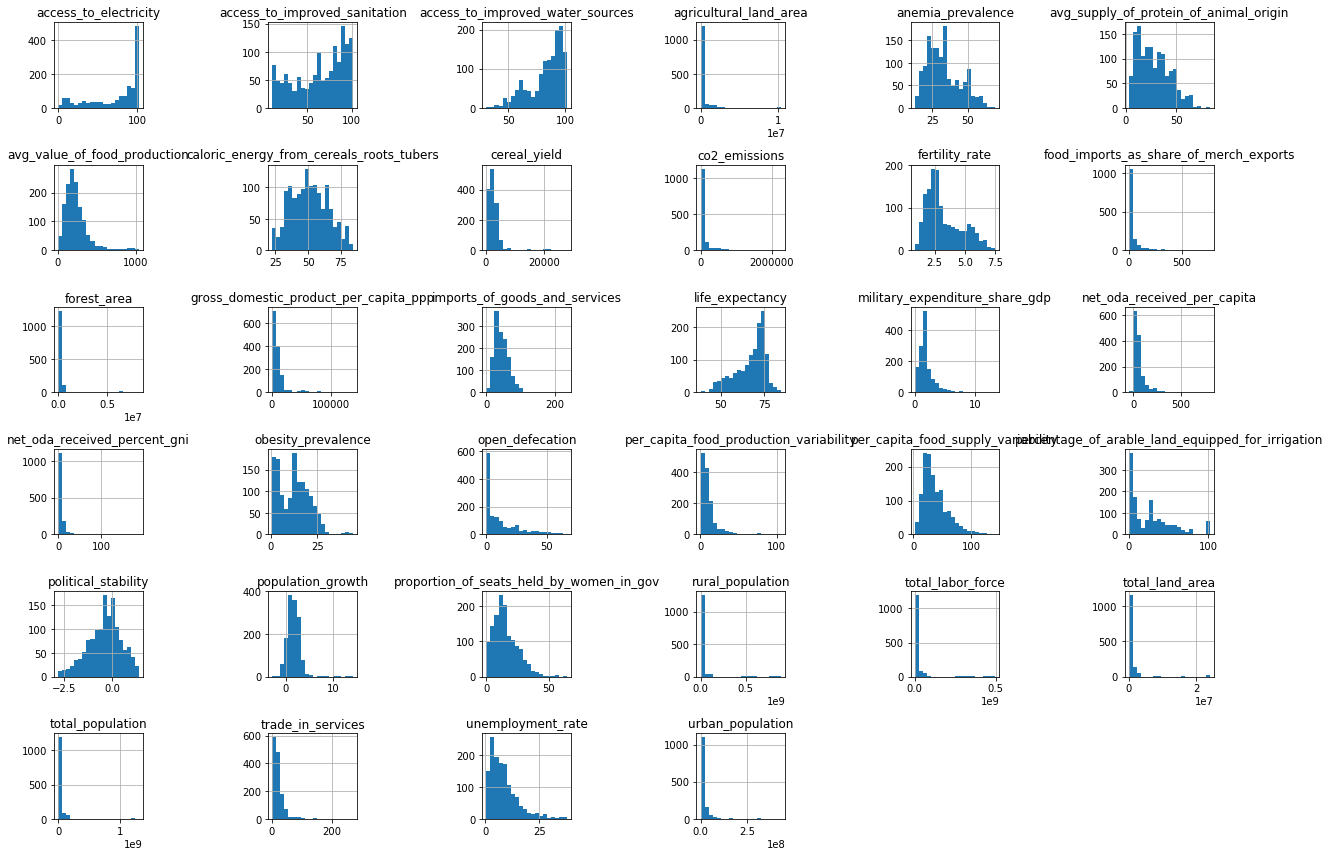

In [126]:
plot_col = ['access_to_electricity',
'access_to_improved_sanitation',
'access_to_improved_water_sources',
'agricultural_land_area',
'anemia_prevalence',
'avg_supply_of_protein_of_animal_origin',
'avg_value_of_food_production',
'caloric_energy_from_cereals_roots_tubers',
'cereal_yield',
'co2_emissions',
'fertility_rate',
'food_imports_as_share_of_merch_exports',
'forest_area',
'gross_domestic_product_per_capita_ppp',
'imports_of_goods_and_services',
'life_expectancy',
'military_expenditure_share_gdp',
'net_oda_received_per_capita',
'net_oda_received_percent_gni',
'obesity_prevalence',
'open_defecation',
'per_capita_food_production_variability',
'per_capita_food_supply_variability',
'percentage_of_arable_land_equipped_for_irrigation',
'political_stability',
'population_growth',
'proportion_of_seats_held_by_women_in_gov',
'rural_population',
'total_labor_force',
'total_land_area',
'total_population',
'trade_in_services',
'unemployment_rate',
'urban_population'
]
def draw_histograms(df, variables, n_rows, n_cols):
    #fig=plt.figure(figsize=(14, 10))
    fig=plt.figure(figsize=(n_cols * 3, n_rows * 2))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.savefig("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/feature_describe_grid_figure.pdf")
    plt.show()
    

draw_histograms(alldata[plot_col], plot_col, 6, 6)
#alldata[select_corr23].hist()



C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log10


0.17488182669455796


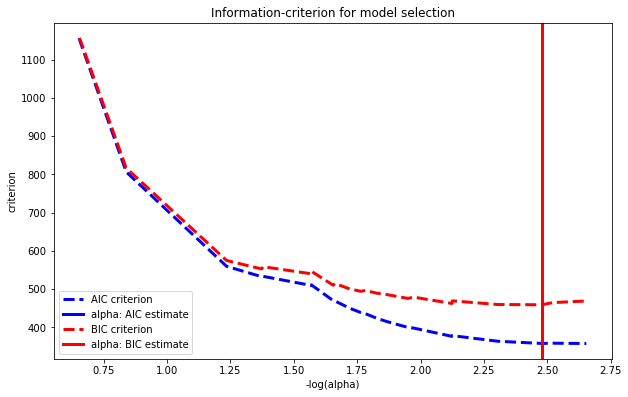

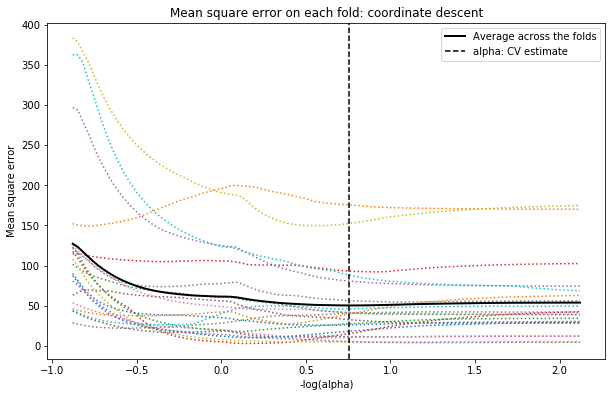

In [127]:
# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = linear_model.LassoLarsIC(criterion='bic')
#t1 = time.time()
model_bic.fit(x_train, y_train)
#t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = linear_model.LassoLarsIC(criterion='aic')
model_aic.fit(x_train, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure(figsize=(10, 6.18))
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
#print("Computing regularization path using the coordinate descent lasso...")
#t1 = time.time()
model = linear_model.LassoCV(cv=20).fit(x_train, y_train)
#t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure(figsize=(10, 6.18))
#ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
#plt.ylim(ymin, ymax)

print(model.alpha_)

In [128]:
#try_different_method
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

y_score = tree_reg.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 8.983608929746664


In [129]:
from sklearn import svm
svr = svm.SVR()
svr.fit(x_train, y_train)

y_score = svr.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 8.507066889881052


In [130]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train, y_train)

y_score = knn.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 9.489185448330558


In [131]:
from sklearn import ensemble
rf =ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
rf.fit(x_train, y_train)

y_score = rf.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 7.276442419451183


In [132]:
ada = ensemble.AdaBoostRegressor(n_estimators=50)
ada.fit(x_train, y_train)

y_score = ada.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 7.720939475977441


In [133]:
gbrt = ensemble.GradientBoostingRegressor(n_estimators=100)
gbrt.fit(x_train, y_train)

y_score = gbrt.predict(x_test) 
print_metrics(y_test, y_score, 28)

Root Mean Square Error = 6.923096164159828


In [134]:
#y_predi = rf.predict(x_predi) # 10.4558 final results bad, looks like overfitting
#y_predi = svr.predict(x_predi) # 9.3548
#y_predi = knn.predict(x_predi) # 11.1353
#y_predi = gbrt.predict(x_predi) # 10.5959
y_predi = ada.predict(x_predi)


np.savetxt("A:/Zhao/TTG_backup/training/MS_DS/DAT102xFinalCapstone/data/predi2_ada.csv",y_predi,delimiter=",")


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


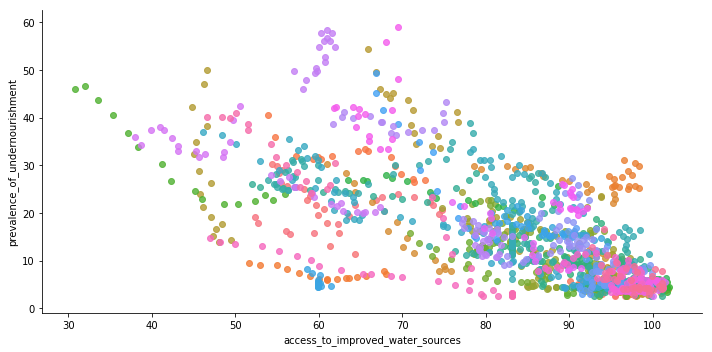

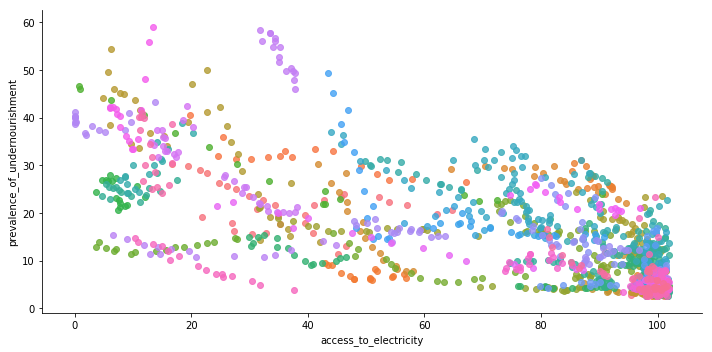

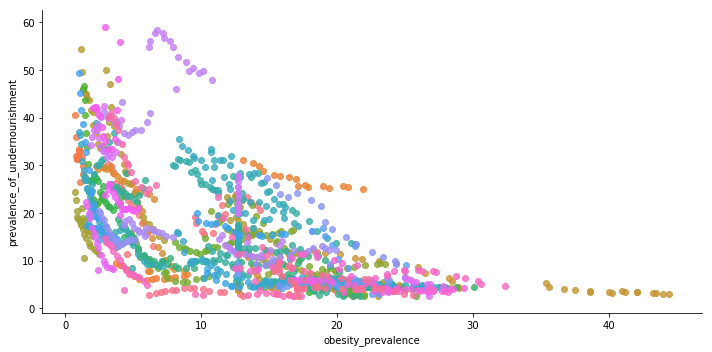

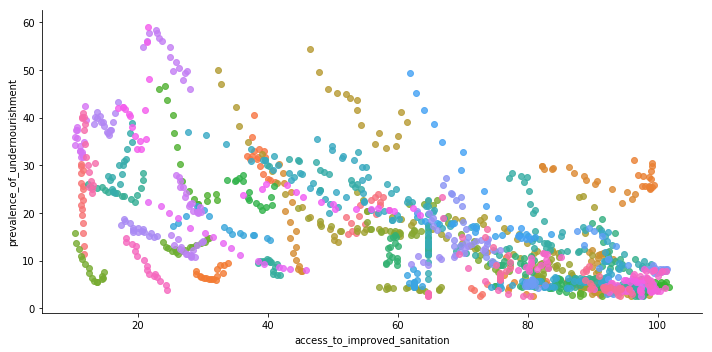

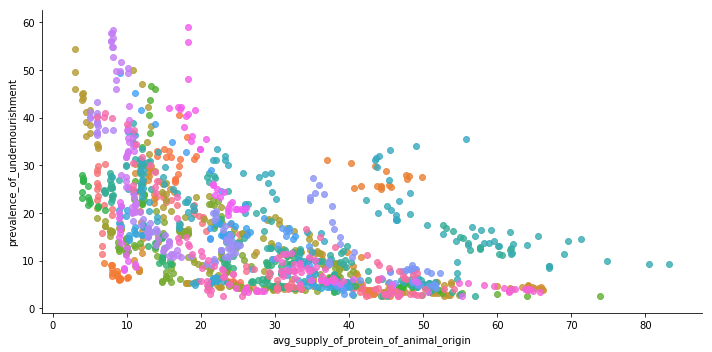

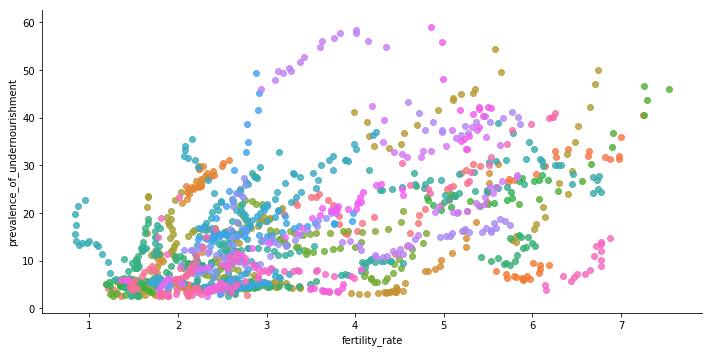

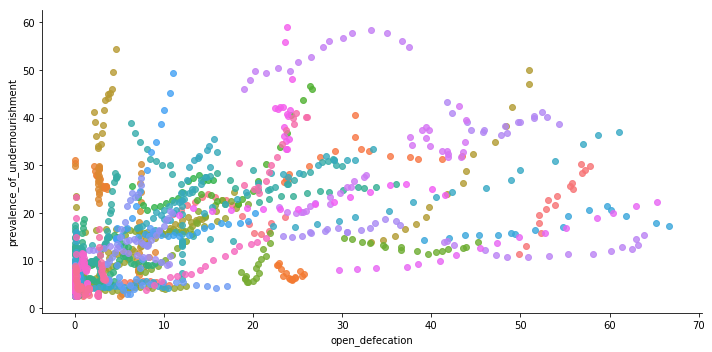

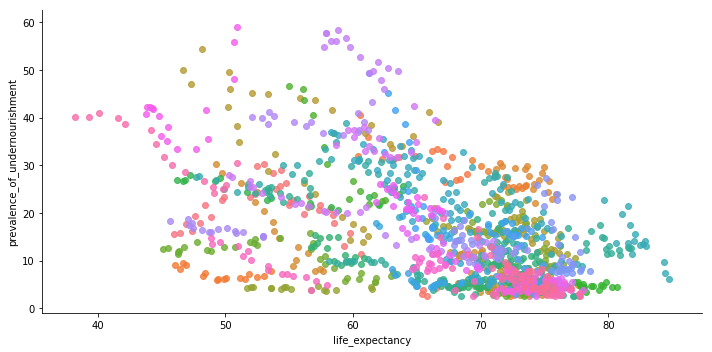

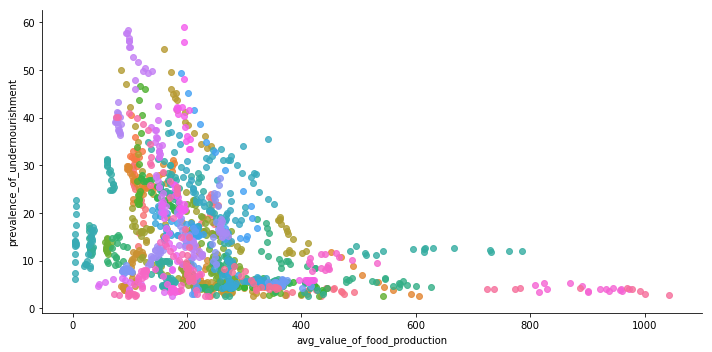

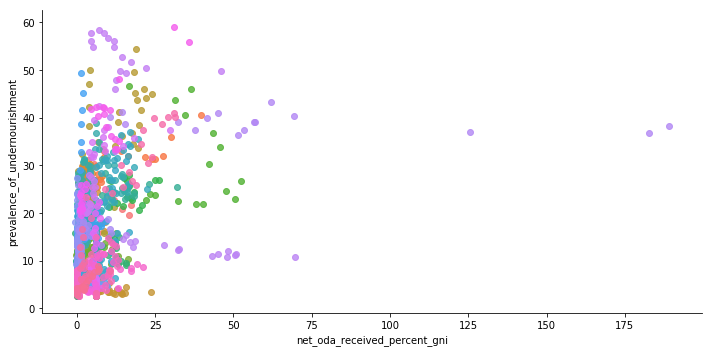

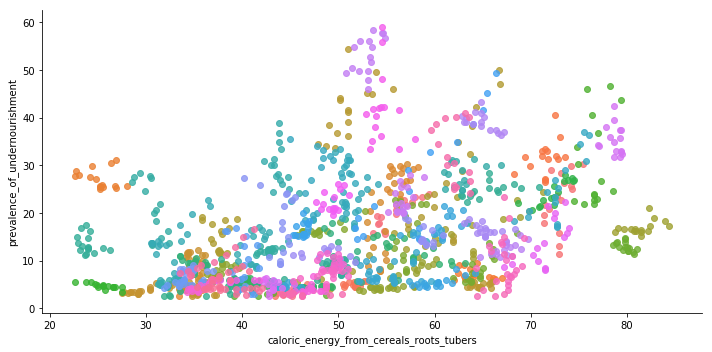

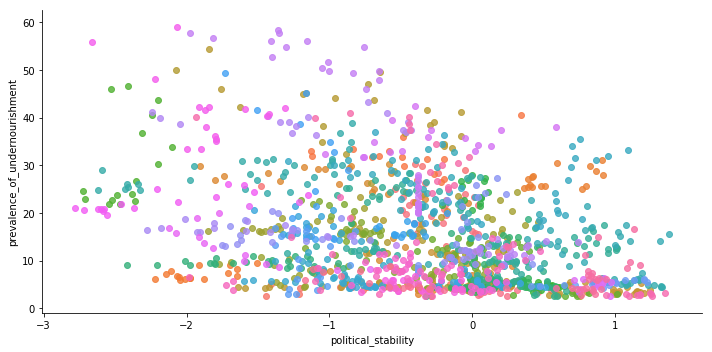

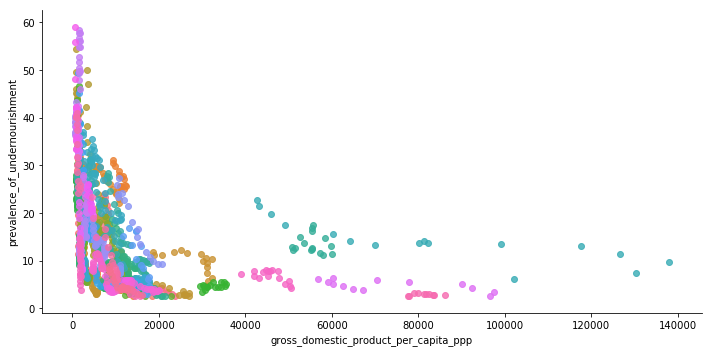

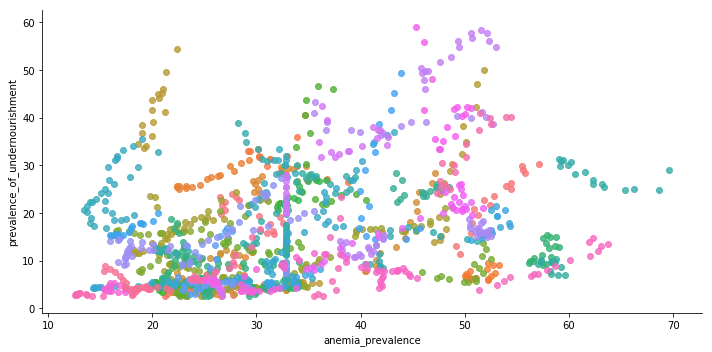

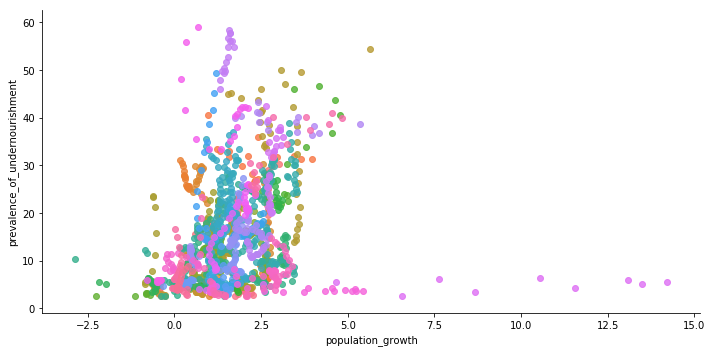

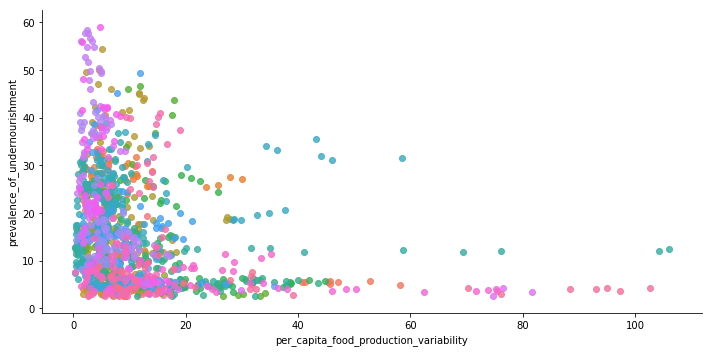

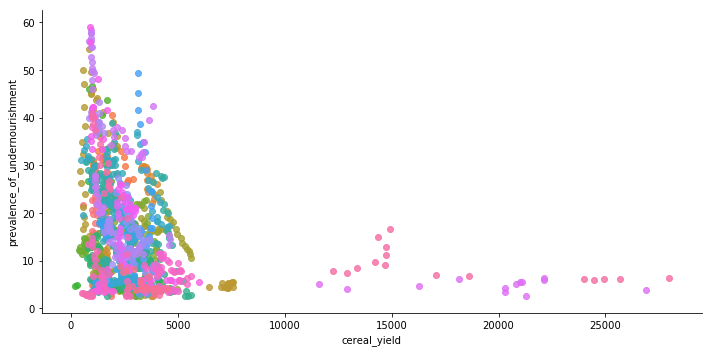

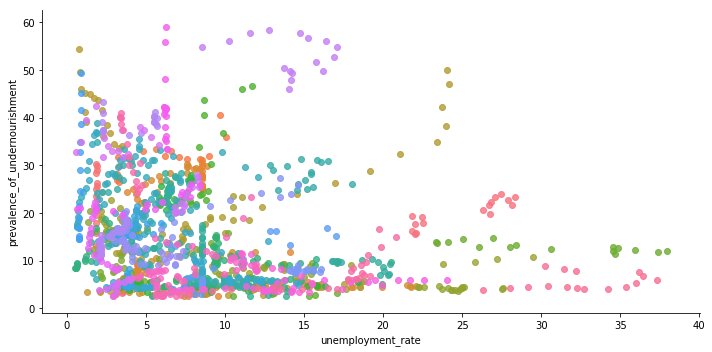

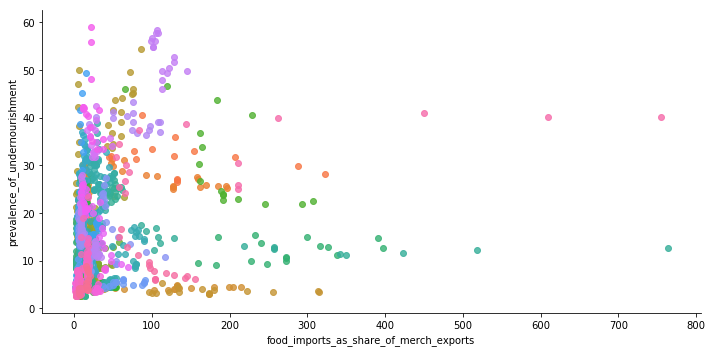

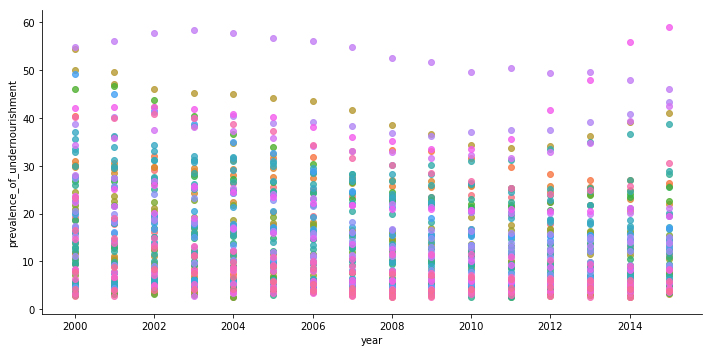

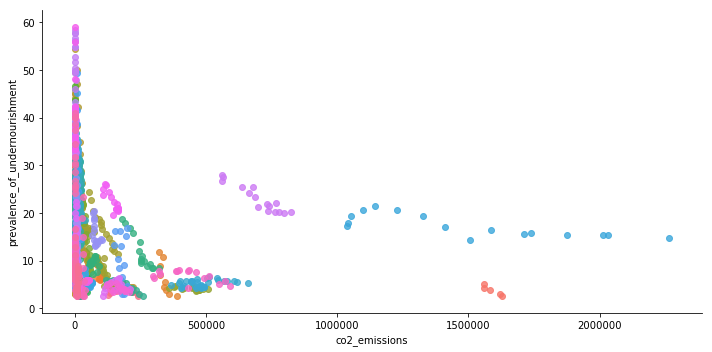

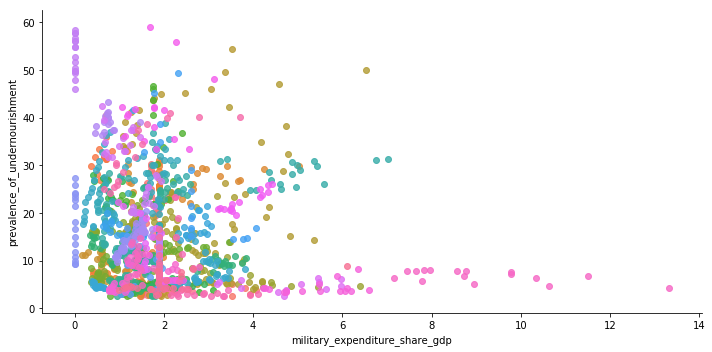

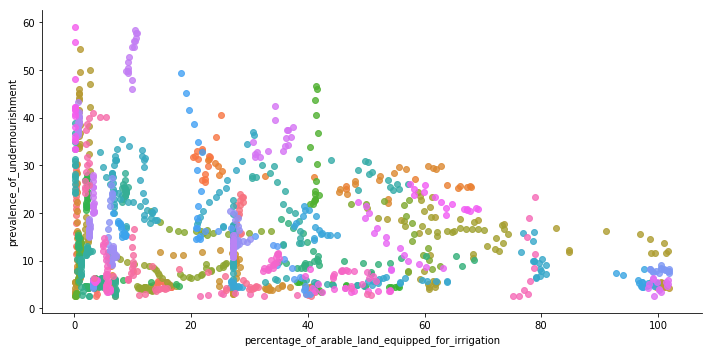

In [135]:
for xplot in select_corr23:
    sns.lmplot(data=alldata, y="prevalence_of_undernourishment", x=xplot, hue="country_code", fit_reg=False, legend=False, aspect=2)